In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [137]:
n=5000
A=np.zeros((n,n))

v=np.logspace(-5,np.log10(np.sqrt(24*1.602e-19/m)),n)
v=np.reshape(v,(n,1))
dv=v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)
'''
v=np.arange(1,1001)
v=np.reshape(v,(n,1))
dv=np.ones(n)
'''

'\nv=np.arange(1,1001)\nv=np.reshape(v,(n,1))\ndv=np.ones(n)\n'

In [138]:
np.shape(v)

(5000, 1)

In [139]:
def vm(v):
    return 5e-20*n0*np.sqrt(2/m*1.6e-19)
def dvm(v):
    return 0

In [140]:
def a(v):
    return k*T0*vm(v)/m0 + q**2*E**2/(3*vm(v))
def b(v):
    return v**3*vm(v)*m/(m0*v**2) + 2*v*q**2*E**2/(m*vm(v))/(3*m*v**2)#(k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [141]:
def alpha(i):
    return a(v[i])/dv[i]**2
def beta(i):
    return -(2*a(v[i])/dv[i]**2+b(v[i])/dv[i])
def gamma(i):
    return a(v[i])/dv[i]**2+b(v[i])/dv[i]+c(v[i])

[[  1.00000000e+00  -1.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  5.02239819e-53  -9.12840303e+05   9.12840303e+05 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.97032933e-53  -9.03376586e+05 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -5.61211389e-16
    5.73404544e-16   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.21508796e-75
   -5.60980031e-16   5.73173187e-16]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]] 



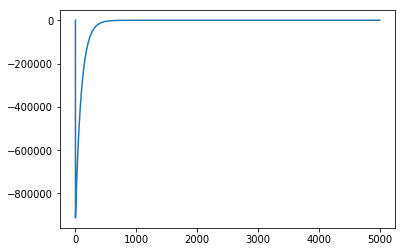

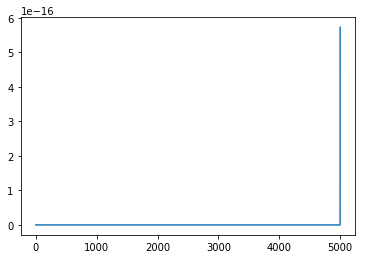

In [142]:
A[0,0]=1
A[0,1]=-1
for i in range(1,n-1):
    A[i,i-1]=alpha(i)
    A[i,i]=beta(i)
    A[i,i+1]=gamma(i)
A[n-1,n-1]=1

In [ ]:
value, vector=np.linalg.eig(A)

In [ ]:
print(A,'\n')
plt.plot(value)
plt.show()
#print(value)
plt.plot(vector[n-2,:])
plt.show()

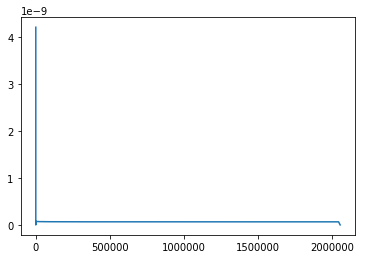

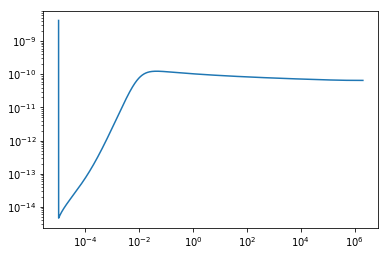

In [143]:
f0=vector[0,:]
f0=f0/np.sum(f0*dv) #Normalising f0
plt.plot(v,f0)
plt.show()
plt.loglog(v,f0)
plt.show()

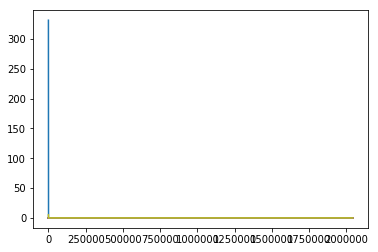

In [144]:
f1=-q*E*(f0[1:]-f0[:n-1])/dv[:n-1]/(m*vm(v[:n-1]))
plt.plot(v[:n-1],f1)
plt.show()

In [145]:
W=np.sum(dv[:n-1]*f1[:n-1]*v[:n-1]*2/3)

In [146]:
eps=np.sum(0.5*m*v**2*f0*dv)

In [147]:
np.sum(f1*dv[:n-1])

0.12489069115343238

In [148]:
print(W/1e4,eps/1.6e-19)

0.654942857652 4.02588697377


In [149]:
W0=0.593e4
eps0=0.7291*1.6e-19

In [150]:
vm(v[:n-1])

2.9633694887195528e-14